# Data Wrangling


### Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.
### The Data We Have 

    Enhanced Twitter Archive
    Additional Data via the Twitter API
    Image Predictions File

### Steps

    Data wrangling, which consists of:
 <ul>
       <li>Gathering data</li>
       <li>Assessing data
       </li>
       <li>Cleaning data</li>
</ul>
        
    Storing, analyzing, and visualizing our wrangled data
    Reporting on 1) our data wrangling efforts and 2) our data analyses and visualizations

# code 

In [ ]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import warnings
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline
matplotlib.style.use('ggplot')


# Gathering

In [4]:
#Read CSV file 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [5]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )


In [15]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
auth = tweepy.OAuthHandler('*******', '*********')
auth.set_access_token('********', '*********')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in twitter_archive['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 736
Rate limit reached. Sleeping for: 735


In [14]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [16]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [17]:
#we write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [6]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [7]:
tweet_json.head(2)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35126,7405,8955941,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30394,5514,8955941,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L


In [20]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


# Assessing data
## Visual assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment purposes.


In [21]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [22]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35126,7405,8955941,18,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30394,5514,8955941,18,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22849,3638,8955941,18,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38404,7585,8955941,18,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36657,8159,8955941,18,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,18483,2740,8955941,18,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,10747,1772,8955941,18,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,59145,16573,8955941,18,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,25439,3788,8955941,18,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,29043,6425,8955941,18,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


### Programmatic assessment 

In [24]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
sum(twitter_archive['tweet_id'].duplicated())

0

In [26]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 204, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 143, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 666, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1176, 'text'])
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text'])

1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object
189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object
Series([], Name: text, dtype: object)
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object


In [32]:
#print whole text in order to verify numerators and denominators
print(twitter_archive['text'][1120]) #17 dogs not 170
print(twitter_archive['text'][1634]) #13 dogs not 130
print(twitter_archive['text'][313]) #just a tweet to explain actual ratings, this will be ignored when cleaning data
print(twitter_archive['text'][189]) #no picture, this will be ignored when cleaning data
print(twitter_archive['text'][1779]) #12 dogs

Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq


In [33]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [34]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 11, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 16, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 15, 'text'])
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text'])

784     RT @dog_rates: After so many requests, this is...
1068    After so many requests, this is Bretagne. She ...
1662    This is Darrel. He just robbed a 7/11 and is i...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1663    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object
342    @docmisterio account started on 11/15/15
Name: text, dtype: object
516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [35]:
print(twitter_archive['text'][784]) #retweet - it will be deleted when delete all retweets
print(twitter_archive['text'][1068]) #actual rating 14/10 need to change manually
print(twitter_archive['text'][1662]) #actual rating 10/10 need to change manually
print(twitter_archive['text'][2335]) #actual rating 9/10 need to change manually
print(twitter_archive['text'][1663]) # tweet to explain rating
print(twitter_archive['text'][342]) #no rating - delete
print(twitter_archive['text'][516]) #no rating - delete

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible
@docmisterio account started on 11/15/15
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


In [36]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1016,709901256215666688,https://pbs.twimg.com/media/CdoTbL_XIAAitq2.jpg,2,bib,0.998814,False,handkerchief,0.000512,False,umbrella,0.000224,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
689,684188786104872960,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True
1341,758828659922702336,https://pbs.twimg.com/media/Cofmom_VUAA4dRO.jpg,1,Chesapeake_Bay_retriever,0.480048,True,vizsla,0.264522,True,Weimaraner,0.121840,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,0.063899,True
255,670755717859713024,https://pbs.twimg.com/media/CU8AwZ_UsAA-Lbu.jpg,1,keeshond,0.994065,True,Norwegian_elkhound,0.001827,True,cairn,0.001821,True
909,700518061187723268,https://pbs.twimg.com/media/Cbi9dI_UYAAgkyC.jpg,1,American_Staffordshire_terrier,0.569501,True,Staffordshire_bullterrier,0.211308,True,Chihuahua,0.121839,True
83,667495797102141441,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,1,Chihuahua,0.143957,True,Christmas_stocking,0.118651,False,ski_mask,0.092482,False
88,667530908589760512,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,1,golden_retriever,0.633037,True,kuvasz,0.146391,True,Labrador_retriever,0.046184,True
985,707610948723478529,https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg,1,golden_retriever,0.383223,True,cocker_spaniel,0.165930,True,Chesapeake_Bay_retriever,0.118199,True


In [37]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [38]:
sum(image_prediction.jpg_url.duplicated())

66

In [39]:
pd.concat(g for _, g in image_prediction.groupby("jpg_url") if len(g) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [42]:
print(image_prediction.p1_dog.value_counts())
print(image_prediction.p2_dog.value_counts())
print(image_prediction.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [43]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [44]:
tweet_json.sample(5)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2206,668226093875376128,270,93,8955989,18,Twitter for iPhone,Original tweet,https://t.co/jWVwSppaa2
130,866334964761202691,48442,12838,8955942,18,Twitter for iPhone,Original tweet,https://t.co/W86h5dgR6c
1125,726828223124897792,3438,962,8955968,18,Twitter for iPhone,Original tweet,https://t.co/DWNrPPXgHA
1418,696754882863349760,1432,347,8955969,18,Twitter for iPhone,Original tweet,https://t.co/l9k7TPP7Tp
940,750506206503038976,4318,1113,8955967,18,Twitter for iPhone,Original tweet,https://t.co/SVU00Sc9U2


In [45]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
tweet_id            2331 non-null object
favorite_count      2331 non-null int64
retweet_count       2331 non-null int64
followers_count     2331 non-null int64
friends_count       2331 non-null int64
source              2331 non-null object
retweeted_status    2331 non-null object
url                 2331 non-null object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [46]:
tweet_json.retweeted_status.value_counts()

Original tweet       2168
This is a retweet     163
Name: retweeted_status, dtype: int64

In [47]:
tweet_json.source.value_counts()

Twitter for iPhone     2197
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source, dtype: int64

## A- Quality

Completeness, validity, accuracy, consistency (content issues)

#### A1- twitter_archive

    1.1 Delete columns that won't be used for analysis
    1.2 tweet_id is an integer
    1.3 Separate timestamp into day - month - year (3 columns)
    1.4 Clean decimal values in rating numerators.
    1.5 Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.


 
#### A2- image_prediction

    2.1 Drop 66 jpg_url duplicated
    2.2 Create 1 column for image prediction and 1 column for confidence level
    2.3 Delete columns that won't be used for analysis

#### A3- tweet_json

    3.1 Keep original tweets only

## B- Tidiness


    B-1- One variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

    B-2 All tables should be part of one dataset



# Cleaning Data 

In [37]:
# copy data 
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

<b>A1- twitter_archive</b>
### Define
1.1 Delete columns that won't be used for analysis

### code

In [38]:
#CODE: Delete columns no needed
twitter_archive_clean = twitter_archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

### TEST

In [39]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

<b>A1-Twitter_archive</b>  
### Define
1.2 tweet_id is an integer

### Code

In [73]:
# Change 'tweet_id' to a string
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

### Test

In [41]:
#TEST
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(2), object(8)
memory usage: 184.1+ KB


<b>A1-Twitter_archive</b>  
### Define- 
1.3 Separate timestamp into day - month - year (3 columns)

First convert timestamp to datetime. Then extract year, month and day to new columns. Finally drop timestamp column.

### Code

In [42]:
#CODE: convert timestamp to datetime
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
twitter_archive_clean = twitter_archive_clean.drop('timestamp', 1)

### Test

In [43]:
#TEST
list(twitter_archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'year',
 'month',
 'day']

<b>A1-Twitter_archive</b>  
### Define
1.4 Clean decimal values in rating numerators.


### Code

In [44]:
# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,None,2017,7,8
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,None,None,None,None,2017,2,16
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None,2016,10,13
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,None,2016,9,20
1689,681340665377193984,I've been told there's a slight possibility he...,5,10,None,None,None,None,None,2015,12,28
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,None,2015,12,25


In [45]:
ratings = twitter_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


In [76]:
twitter_archive_clean['rating_numerator'] = ratings[0]
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)

### Test

In [78]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,tweet_id,text,rating_numerator,rating_denominator,name,year,month,day,dog_stage
45,883482846933004288,This is Bella. She hopes her smile made you sm...,13.50,10,Bella,2017,7,8,NaN
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",9.75,10,Logan,2017,2,16,NaN
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",9.75,10,Logan,2016,10,13,NaN
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10,Sophie,2016,9,20,NaN
1689,681340665377193984,I've been told there's a slight possibility he...,9.50,10,None,2015,12,28,NaN
1712,680494726643068929,Here we have uncovered an entire battalion of ...,11.26,10,None,2015,12,25,pupper


<b>A1-Twitter_archive</b>  
### Define
1.5 - Calulate the value of the numerator divided by the denominator and save this in a new column called 'rating'.

### Code

In [91]:
# Calulate the value of 'rating'
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

### Test

In [93]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
name                  2356 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dog_stage             399 non-null object
rating                2356 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 184.1+ KB


<b>A2- image_prediction </b> 
### Define
2.1 Drop 66 jpg_url duplicated


### Code

In [48]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [49]:
#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

<b>A2- image_prediction </b> 
### Define 
2.2 - Create 1 column for image prediction and 1 column for confidence level
Create a function where I keep the first true prediction along the confidence level as new columns.

### Code

In [50]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

In [51]:
#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

### Test

In [52]:
#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1691 non-null object
jpg_url            1691 non-null object
img_num            1691 non-null int64
p1                 1691 non-null object
p1_conf            1691 non-null float64
p1_dog             1691 non-null bool
p2                 1691 non-null object
p2_conf            1691 non-null float64
p2_dog             1691 non-null bool
p3                 1691 non-null object
p3_conf            1691 non-null float64
p3_dog             1691 non-null bool
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 163.5+ KB


<b>A2- image_prediction </b> 
### Define 
2.3- Delete columns that won't be used for analysis


### Code

In [53]:
#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


### Test

In [54]:
#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

<b>A3 - Tweet_json</b> 
### Define 
3.1 - keep 2168 original tweets

### Code

In [55]:
#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

### Test

In [56]:
#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2168
Name: retweeted_status, dtype: int64

<b>B- Tidiness</b>
### Define
1 variable (dog stage) in 4 different columns (doggo, floofer, pupper, and puppo)

### code

In [57]:
# Extract dog stages from 'text' column into new 'dog_stage' column 
twitter_archive_clean['dog_stage'] =twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [58]:
# Check that first few instances of dog_stage are similar 
# to that which was previously extracted
twitter_archive_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [59]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### test

In [72]:
# Check for presence of 'dog_stage" and absence of 'doggo', 'floofer', 
# 'pupper', and 'puppo'
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
year                  2356 non-null int64
month                 2356 non-null int64
day                   2356 non-null int64
dog_stage             399 non-null object
dtypes: int64(4), object(5)
memory usage: 165.7+ KB


<b>B- Tidiness</b> 
### Define
B-2 All tables should be part of one dataset

### Code

In [94]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(twitter_archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

In [95]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])


### Test

In [63]:
df_twitter['rating_numerator'].value_counts()

12       426
10       360
11       356
13       230
9        133
8         68
7         32
14        24
6         16
5         13
4          7
3          5
2          2
143        1
88         1
165        1
45         1
44         1
80         1
84         1
60         1
50         1
99         1
0          1
24         1
1          1
144        1
13.5       1
121        1
9.75       1
11.26      1
11.27      1
Name: rating_numerator, dtype: int64

## Storing, Analyzing, and Visualizing Data 

In [96]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

### Insight one & visualization
Golden retriever is the most common dog in this dataset.


In [86]:
df_twitter['dog_type'].value_counts()

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                63
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
German_shepherd                    21
Staffordshire_bullterrier          21
Cardigan                           21
beagle                             20
Shih-Tzu                           20
Siberian_husky                     20
Shetland_sheepdog                  19
kuvasz                             19
Maltese_dog                        19
Rottweiler                         19
Lakeland_terrier                   18
Italian_grey

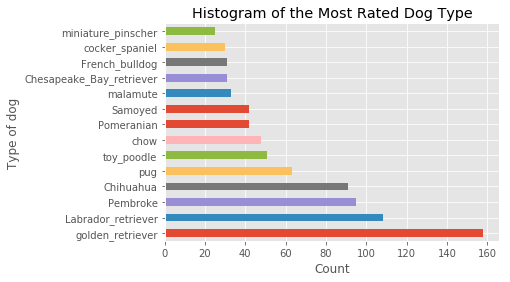

In [87]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

### Insight two

Japanese_spaniel has the lowest average rating Clumber has the highest average rating

In [98]:
df_dog_type_mean = df_twitter.groupby('dog_type').mean()

In [89]:
df_dog_type_mean.head()

,rating_denominator,year,month,day,favorite_count,retweet_count,followers_count,friends_count
dog_type,,,,,,,,
Afghan_hound,10.0,2016.666667,4.666667,16.000000,10789.000000,3020.500000,8.955944e+06,18.0
Airedale,10.0,2015.583333,8.750000,15.916667,4676.166667,1180.250000,8.955969e+06,18.0
American_Staffordshire_terrier,10.0,2016.187500,5.250000,15.000000,7486.000000,1741.733333,8.955960e+06,18.0
Appenzeller,10.0,2016.500000,4.500000,18.500000,6503.500000,1213.500000,8.955955e+06,18.0
Australian_terrier,10.0,2016.500000,3.500000,7.000000,9903.500000,2627.500000,8.955955e+06,18.0


In [99]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()
df_dog_type_sorted

dog_type
Japanese_spaniel               0.500000
soft-coated_wheaten_terrier    0.880000
Scotch_terrier                 0.900000
Walker_hound                   0.900000
Tibetan_terrier                0.925000
dalmatian                      0.933333
Boston_bull                    0.941667
Welsh_springer_spaniel         0.950000
Maltese_dog                    0.952632
Dandie_Dinmont                 0.957143
miniature_schnauzer            0.960000
Norwich_terrier                0.960000
Afghan_hound                   0.966667
redbone                        0.966667
Scottish_deerhound             0.975000
Rhodesian_ridgeback            0.975000
Great_Dane                     0.981818
Airedale                       0.983333
Newfoundland                   0.985714
Mexican_hairless               0.985714
Saint_Bernard                  0.985714
miniature_poodle               0.987500
English_setter                 0.987500
miniature_pinscher             1.000000
Irish_terrier                  

In [51]:
print(df_twitter.loc[df_twitter.dog_type == 'Japanese_spaniel', 'url'])

870    https://t.co/IoLRvF0Kak
Name: url, dtype: object


In [52]:
df_twitter[df_twitter['dog_type'] == 'golden_retriever']

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
10,667530908589760512,Meet Naphaniel. He doesn't necessarily enjoy h...,10.0,10.0,Naphaniel,None,2015,11,20,10.0,https://pbs.twimg.com/media/CUOL0uGUkAAx7yh.jpg,golden_retriever,0.633037,432.0,219.0,8955988.0,18.0,Twitter Web Client,Original tweet,https://t.co/xoRWyQTcmy
29,667044094246576128,12/10 gimme now https://t.co/QZAnwgnOMB,12.0,10.0,None,None,2015,11,18,12.0,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,golden_retriever,0.765266,174.0,44.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/QZAnwgnOMB
38,667160273090932737,This is Bradlay. He is a Ronaldinho Matsuyama ...,11.0,10.0,Bradlay,None,2015,11,19,11.0,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,golden_retriever,0.471351,235.0,55.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/DKhgkMx4N1
42,667211855547486208,This is Genevieve. She is a golden retriever c...,9.0,10.0,Genevieve,None,2015,11,19,9.0,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,golden_retriever,0.462556,448.0,220.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/azEoGqVonH
45,667182792070062081,This is Timison. He just told an awful joke bu...,10.0,10.0,Timison,None,2015,11,19,10.0,https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg,golden_retriever,0.949892,13185.0,5605.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/s2yYuHabWl
54,668286279830867968,Meet Rusty. Rusty's dreaming of a world where ...,11.0,10.0,Rusty,None,2015,11,22,11.0,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,golden_retriever,0.215944,470.0,126.0,8955989.0,18.0,Twitter for iPhone,Original tweet,https://t.co/C8U6cxI1Jc
78,666345417576210432,Look at this jokester thinking seat belt laws ...,10.0,10.0,None,None,2015,11,16,10.0,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,golden_retriever,0.858744,266.0,128.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/VFKG1vxGjB
84,666063827256086533,This is the happiest dog you will ever see. Ve...,10.0,10.0,the,None,2015,11,16,10.0,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,golden_retriever,0.77593,435.0,190.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/RhUEAloehK
103,666057090499244032,My oh my. This is a rare blond Canadian terrie...,9.0,10.0,a,None,2015,11,16,9.0,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.00795896,264.0,118.0,8955988.0,18.0,Twitter for iPhone,Original tweet,https://t.co/yWBqbrzy8O
120,876484053909872640,This is Benedict. He wants to thank you for th...,13.0,10.0,Benedict,None,2017,6,18,13.0,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,17182.0,2088.0,8956319.0,18.0,Twitter for iPhone,Original tweet,https://t.co/ccBFQU5UWO


### Insight three & visualization

Dog_types with low number of ratings show a high variaty of mean ratings.

In [53]:
df_dog_type_count = df_twitter.groupby('dog_type').count()
df_dog_type_count

,tweet_id,text,rating_numerator,rating_denominator,name,dogs_stage,year,month,day,rating,jpg_url,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
dog_type,,,,,,,,,,,,,,,,,,,
Afghan_hound,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2
Airedale,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,16,16,16,16,16,16,16,16,16,16,16,16,15,15,15,15,15,15,15
Appenzeller,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bedlington_terrier,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Bernese_mountain_dog,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Blenheim_spaniel,11,11,11,11,11,11,11,11,11,11,11,11,10,10,10,10,10,10,10
Border_collie,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12


In [54]:
dog_type_count = df_dog_type_count['rating']
dog_type_mean = df_dog_type_mean['rating']
dog_type_mean

dog_type
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.272727
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.549451
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.875000
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog             

In [55]:
df = pd.DataFrame()
df['dog_type_count'] = dog_type_count
df['dog_type_mean'] = dog_type_mean
df

,dog_type_count,dog_type_mean
dog_type,,
Afghan_hound,3,9.666667
Airedale,12,9.833333
American_Staffordshire_terrier,16,10.312500
Appenzeller,2,11.000000
Australian_terrier,2,11.500000
Bedlington_terrier,6,10.333333
Bernese_mountain_dog,11,11.272727
Blenheim_spaniel,11,11.272727
Border_collie,12,10.583333


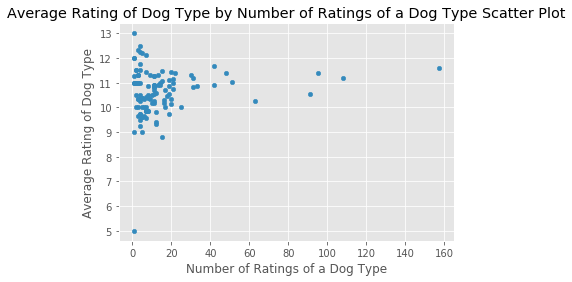

In [56]:
df.plot(x='dog_type_count', y='dog_type_mean', kind='scatter')
plt.xlabel('Number of Ratings of a Dog Type')
plt.ylabel('Average Rating of Dog Type')
plt.title('Average Rating of Dog Type by Number of Ratings of a Dog Type Scatter Plot')

fig = plt.gcf()
#plt.savefig('X:/' + newName + '.png', 
fig.savefig('output2.png',bbox_inches='tight');

### Insight four & visualization

The highest ratings do not receive the most retweets.

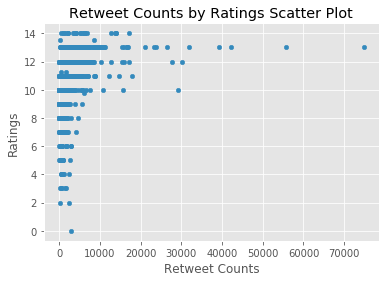

In [57]:
df_twitter.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')

fig = plt.gcf()
fig.savefig('output3.png',bbox_inches='tight');